In [1]:
import gym
import cv2
import numpy as np
from PIL import Image
from time import sleep
from IPython import display

In [2]:
def matrix_to_image(image: np.ndarray, channel_range: tuple=(0, 255)) -> Image:
    """
    Convert the input matrix to an image.
    Args:
        image: the matrix of shape [height, width, channel] to convert
        channel_range: the range to clip the channel values to (inclusive)
    Returns:
        an image from the pixels in the image array
    """
    # clip the values in the image to the boundary [0, 255]. This is the
    # legal range for channel values. Image uses a method called 'to bytes'
    # to compress the input array into a simpler binary representation for
    # graphics processing. As such, convert the type to a single byte to
    # satisfy this constraint.
    image = np.clip(image, *channel_range).astype('uint8')

    return Image.fromarray(image)

In [3]:
env = gym.make('BreakoutDeterministic-v4')

In [4]:
initial_state = env.reset()
env.render()

True

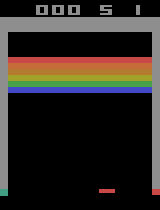

In [5]:
matrix_to_image(initial_state)

In [6]:
for _ in range(5):
    env.step(action=1)
    env.render()

In [7]:
next_state, reward, done, info = env.step(action=env.action_space.sample())
env.render()

True

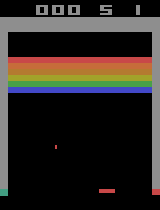

In [8]:
matrix_to_image(next_state)

In [9]:
next_state

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# Downsample

In [10]:
class BreakoutDownsampler(object):
    """A class for downsampling Breakout from RGB to Y."""

    # colors to cancel out to black
    colors_to_cancel = [142]

    def downsample(self, frame: np.ndarray, image_size: tuple=(84, 84)) -> np.ndarray:
        """
        Downsample the given frame.

        Args:
            frame: the frame to downsample
            image_size: the size of the image to return

        Returns:
            a down-sampled image reshaped to the given size

        """
        # convert the frame from RGB to gray scale
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        # crop the image to the playable space
        frame = frame[32:-14, 8:-8]
        # zero out specific colors
        frame[np.in1d(frame, self.colors_to_cancel).reshape(frame.shape)] = 0
        # resize the frame to the expected shape
        frame = cv2.resize(frame, image_size)

        return frame

In [11]:
ds = BreakoutDownsampler()

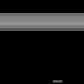

In [12]:
matrix_to_image(ds.downsample(initial_state))

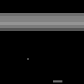

In [13]:
matrix_to_image(ds.downsample(next_state))

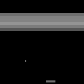

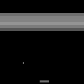

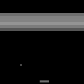

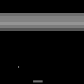

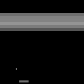

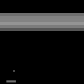

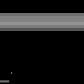

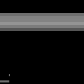

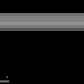

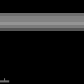

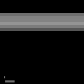

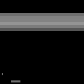

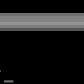

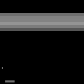

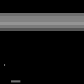

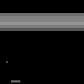

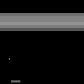

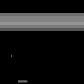

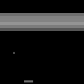

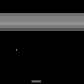

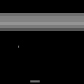

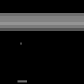

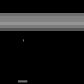

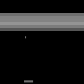

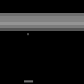

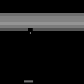

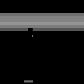

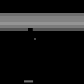

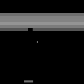

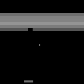

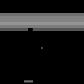

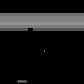

In [14]:
for _ in range(32):
    state, _, _, _ = env.step(action=env.action_space.sample())
    state = ds.downsample(state)

    env.render()
#     display.clear_output(wait=True)
    display.display(matrix_to_image(state))
    sleep(0.3)